#### Problem Statement: To identify the varibables which has directimpact on bike rental count and are significant in predicting thedemand for shared electric cycles in the Indian market

#### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings as war
war.filterwarnings('ignore')

In [2]:
path  = os.getcwd() + r'\Data\bike_sharing.txt'
df = pd.read_csv(path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Data Exploration - Basic

In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

#### Missisng Values

In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
#There are no null values

#### Exploratory Data Analysis

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##### Univariate Analysis

In [10]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
season_dict = {1:'spring',2:'summer',3:'fall',4:'winter'}
#This information was provide alonside

df['season'] = df['season'].map(season_dict)

In [12]:
df['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

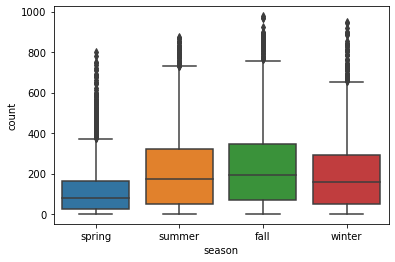

In [13]:
sns.boxplot(x=df['season'], y=df['count'])
plt.show()

#The mean count seems to vary for different seasons

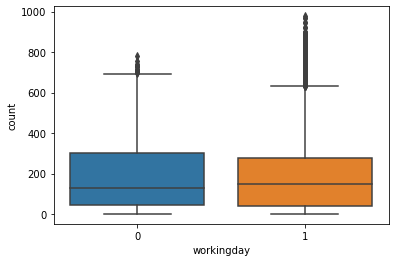

In [14]:
#Lets check if working day has any impact on count or not

sns.boxplot(x=df['workingday'], y=df['count'])
plt.show()

#There seems to be a lot of outliers

#### Outlier Detection

In [15]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)

IQR = Q3 - Q1

df_v1 = df[(df['count'] > (Q1 - 1.5*IQR)) & (df['count'] < (Q3 + 1.5*IQR))] 

In [16]:
print(f'Data before removing outlier: {df.shape[0]}')
print(f'Data after removing outlier:  {df_v1.shape[0]}')

Data before removing outlier: 10886
Data after removing outlier:  10583


In [17]:
df_v1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
df_v1['workingday'].value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

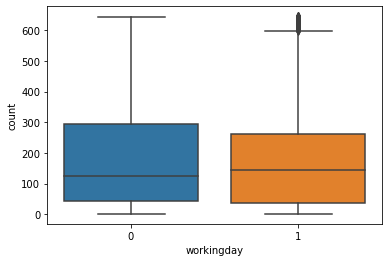

In [19]:
sns.boxplot(x=df_v1['workingday'], y=df_v1['count'])
plt.show()

<AxesSubplot:xlabel='count'>

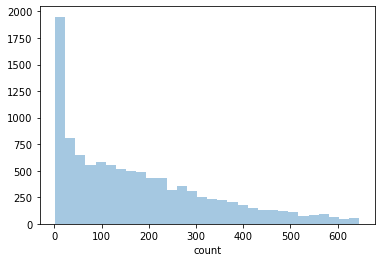

In [20]:
# Count distribution
sns.distplot(df_v1['count'], bins=30,hist=True,kde=False)

In [21]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [22]:
holiday_map = {0: 'Non-holiday', 1:'Holiday'}

df_v1['holiday'] = df_v1['holiday'].map(holiday_map)
df_v1['holiday'].value_counts()

Non-holiday    10274
Holiday          309
Name: holiday, dtype: int64

In [23]:
df_v1['weather'].value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

In [24]:
#Removing the season no 4 as it had only 1 record
df_v1 = df_v1[~(df_v1['weather'] == 4)]

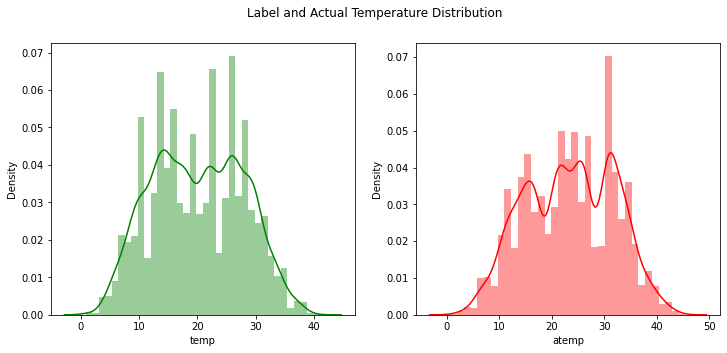

In [25]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Label and Actual Temperature Distribution')
sns.distplot(df_v1['temp'], color="green", ax=ax[0] )
sns.distplot(df_v1['atemp'], color='red', ax=ax[1])
plt.show()

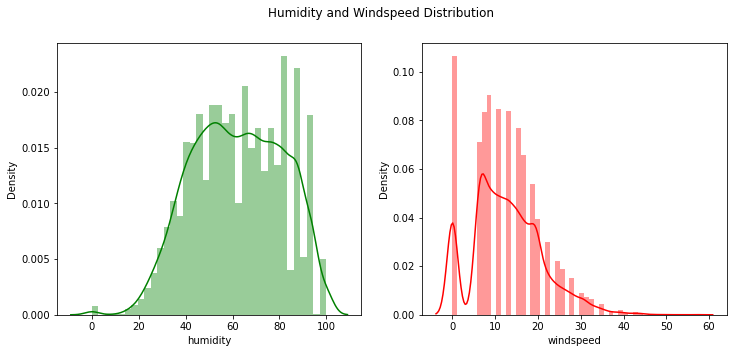

In [26]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Humidity and Windspeed Distribution')
sns.distplot(df_v1['humidity'], color="green", ax=ax[0] )
sns.distplot(df_v1['windspeed'], color='red', ax=ax[1])
plt.show()

##### Multivariate Analysis

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


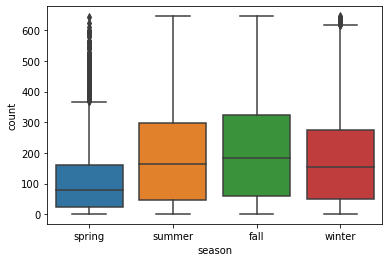

In [28]:
#Season wise count
sns.boxplot(x=df_v1['season'], y= df_v1['count'])
plt.show()

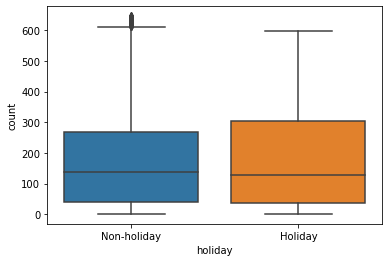

In [29]:
#holiday wise count
sns.boxplot(x=df_v1['holiday'], y= df_v1['count'])
plt.show()

#The median count of Holiday and Non-Holiday seems same. Need to perform some statistical test to get that confirm

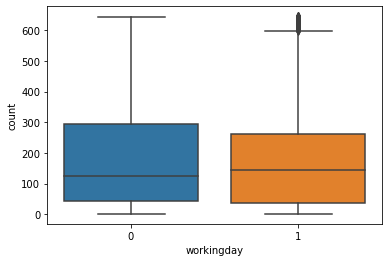

In [30]:
#Workingday wise count
sns.boxplot(x=df_v1['workingday'], y= df_v1['count'])
plt.show()

#The median count of working day seems same. Need to perform some statistical test to get that confirm

In [31]:
df_v1['workingday'].value_counts()

1    7160
0    3422
Name: workingday, dtype: int64

In [32]:
df_v1['holiday'].value_counts()

Non-holiday    10273
Holiday          309
Name: holiday, dtype: int64

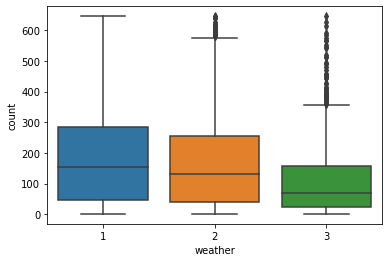

In [33]:
#Weather wise count
sns.boxplot(x=df_v1['weather'], y= df_v1['count'])
plt.show()

## Hypothesis Testing

##### Working Day has effect on number of electric cycles rented?

In [34]:
df_v1['workingday'].value_counts()

1    7160
0    3422
Name: workingday, dtype: int64

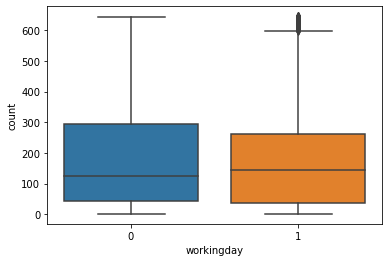

In [35]:
sns.boxplot(x=df_v1['workingday'], y= df_v1['count'])
plt.show()

In [36]:
print('Population Standard Deviation')
df_v1.groupby('workingday')['count'].std().reset_index().rename(columns = {'count':'std'})


Population Standard Deviation


,workingday,std
0,0,163.782166
1,1,152.369597


In [37]:
print('Population Mean')
df_v1.groupby('workingday')['count'].mean().reset_index().rename(columns = {'count':'mean'})


Population Mean


,workingday,mean
0,0,180.965517
1,1,173.012849


- Defining Null and Alternate Hypothesis
- Null Hypothesis: The count of weekday is equal to that of weekend
- Alternate Hypothesis: The count of weekday is greater that of weekend

In [38]:
weekday = df_v1[df_v1['workingday'] == 1]['count'].sample(3422)
weekend = df_v1[df_v1['workingday'] == 0]['count'].sample(3422)

In [39]:
print(f'Sample standard deviation of weekday: {weekday.std()}')
print(f'Sample standard deviation of weekend: {weekend.std()}')

Sample standard deviation of weekday: 151.0167139685379
Sample standard deviation of weekend: 163.78216646076007


In [40]:
print(f'Sample mean of weekday: {weekday.mean()}')
print(f'Sample mean of weekend: {weekend.mean()}')

Sample mean of weekday: 174.2478082992402
Sample mean of weekend: 180.9655172413793


In [41]:
#Since we have two category to test against and the sample size is large enough N>=30. We are going to use Student T-test and it will be one tailed test

In [43]:
#Calculating the p-value

#import the required function

from scipy.stats import ttest_ind
#find the p-value

test_stat, p_value = ttest_ind(weekday,weekend,equal_var=False, alternative='greater')

print('The test_stat is',test_stat)
print('The p-value is',p_value)

The test_stat is -1.7639498024386588
The p-value is 0.96110732823087


In [44]:
#0.05 is the significance level
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the Null hypothesis')

As the p-value 0.96110732823087 is greater than the level of significance, we accept the Null hypothesis


- Conclusion: The count of weekday is equal to that of the weekend